# Creating Bugarian Seed Dictionary

### Loading lists and removing duplicates

In [1]:
import os
path = os.getcwd()

In [2]:
os.chdir(path)

In [3]:
#load files
with open('positive_seed_BG.txt', 'r') as file:
    pos_bg = file.read()
    
with open('negative_seed_BG.txt', 'r') as file:
    neg_bg = file.read()

### POS-tagging and Lemmatization

In [8]:
import classla

In [9]:
#create processing pipeline
nlp = classla.Pipeline('bg', processors='tokenize, pos, lemma')

2023-03-15 16:26:48 INFO: Loading these models for language: bg (Bulgarian):
| Processor | Package  |
------------------------
| tokenize  | standard |
| pos       | standard |
| lemma     | standard |

2023-03-15 16:26:48 INFO: Use device: cpu
2023-03-15 16:26:48 INFO: Loading: tokenize
2023-03-15 16:26:48 INFO: Loading: pos
2023-03-15 16:26:49 INFO: Loading: lemma
2023-03-15 16:26:51 INFO: Done loading processors!


In [44]:
#processing documents
docpos = nlp(pos_bg)
docneg = nlp(neg_bg)

In [45]:
#gathering annotations into lists - positive
pos_pos = []
lemmas_pos = []
pos_bg = []

for sent in docpos.to_dict():
    for word in sent[0]:
        pos_bg.append(word['text'])
        lemmas_pos.append(word['lemma'])
        pos_pos.append(word['upos'])

In [46]:
#gathering annotations into lists - negative
neg_pos = []
lemmas_neg = []
neg_bg = []

for sent in docneg.to_dict():
    for word in sent[0]:
        neg_bg.append(word['text'])
        lemmas_neg.append(word['lemma'])
        neg_pos.append(word['upos'])

### Write new meta files -- for manual correction

    with open('positive_seed_BG_meta.txt', 'w') as f:
        for word, lemma, pos in zip(pos_bg,lemmas_pos, pos_pos):
            f.write(word + '\t' + lemma + '\t' + pos + '\n')

    with open('negative_seed_BG_meta.txt', 'w') as f:
        for word, lemma, pos in zip(neg_bg,lemmas_neg, neg_pos):
            f.write(word + '\t' + lemma + '\t' + pos + '\n')

### Load files with corrections

In [207]:
#load files - positive
with open('positive_seed_BG_meta.txt', 'r') as f:
    lines = [el.split('\t') for el in f.readlines()]

In [208]:
pos_pos = [line[2].rstrip() for line in lines]
lemmas_pos = [line[1] for line in lines]
pos_bg = [line[0] for line in lines]

In [109]:
#load files - negative
with open('negative_seed_BG_meta.txt', 'r') as f:
    lines = [el.split('\t') for el in f.readlines()]

In [110]:
neg_pos = [line[2].rstrip() for line in lines]
lemmas_neg = [line[1] for line in lines]
neg_bg = [line[0] for line in lines]

### Frequency ranking

In [27]:
#read frequency list
with open('BTB-FreqList100000.txt', 'r', encoding = 'utf-16') as file:
    freqlines = [line.split('\t') for line in file.readlines()]

In [28]:
#create frequency dictionary (for reference): {token: frequency}
freq_dict = {}
for line in freqlines:
    freq_dict[line[0]] = float(line[2].rstrip())

In [29]:
#PoS-tag and lemmatize keys (tokens)
keylist = ' '.join(list(freq_dict.keys()))
freqpos = dict()

keydoc = nlp(keylist)

In [187]:
#save lemmas and tags to lists
key_pos = []
key_lemma = []

for sent in keydoc.to_dict():
    for word in sent[0]:
        key_lemma.append(word['lemma'])
        key_pos.append(word['upos'])

In [189]:
#create dictionaries: {lemma: frequency} and {lemma: PoS}
lem_freq = {}

for lemma, line in zip(key_lemma, freqlines):
    lem_freq[lemma] = lem_freq.get(lemma, 0) + float(line[2].rstrip())
    
lem_pos = {}

for lemma, tag in zip(key_lemma, key_pos):
    lem_pos[lemma] = tag

#### Check if all words are in frequency dict

In [209]:
#check if all posiitve words are in frequency list
freq_pos = []
for lemma in lemmas_pos:
    try:
        freq_pos.append(lem_freq[lemma])
    except KeyError as e:
        print('I got a KeyError - reason "%s"' % str(e))
        freq_pos.append(0)

I got a KeyError - reason "'юначен'"
I got a KeyError - reason "'дръзновен'"
I got a KeyError - reason "'импозантен'"
I got a KeyError - reason "'безпристрастие'"
I got a KeyError - reason "'похвалвам-(се)'"
I got a KeyError - reason "'възхвалям'"
I got a KeyError - reason "'превъзнасям-(се)'"
I got a KeyError - reason "'превъзнеса-(се)'"
I got a KeyError - reason "'славословя'"
I got a KeyError - reason "'зачета'"
I got a KeyError - reason "'разсъдлив'"
I got a KeyError - reason "'укрепя'"
I got a KeyError - reason "'ободря'"
I got a KeyError - reason "'ободрявам'"
I got a KeyError - reason "'заслуженост'"
I got a KeyError - reason "'сполуча'"
I got a KeyError - reason "'сполучвам'"
I got a KeyError - reason "'изкусност'"
I got a KeyError - reason "'умелост'"
I got a KeyError - reason "'чалъм'"
I got a KeyError - reason "'добросърдечен'"
I got a KeyError - reason "'добродушие'"
I got a KeyError - reason "'поддържаност'"
I got a KeyError - reason "'приятност'"
I got a KeyError - reason

In [210]:
#proportion not found
freq_pos.count(0)/len(freq_pos)

0.11027568922305764

In [192]:
#check if all negative words are in frequency list
freq_neg = []
for lemma in lemmas_neg:
    try:
        freq_neg.append(lem_freq[lemma])
    except KeyError as e:
        try: 
            freq_neg.append(freq_dict[lemma])
        except KeyError as e:
            print('I got a KeyError - reason "%s"' % str(e))
            freq_neg.append(0)

I got a KeyError - reason "'гнусота'"
I got a KeyError - reason "'травматичен'"
I got a KeyError - reason "'травмирам'"
I got a KeyError - reason "'зложелание'"
I got a KeyError - reason "'избухливост'"
I got a KeyError - reason "'дивам-(се)'"
I got a KeyError - reason "'невежлив'"
I got a KeyError - reason "'неучтив'"
I got a KeyError - reason "'привилизова'"
I got a KeyError - reason "'безбожен'"
I got a KeyError - reason "'безбожие'"
I got a KeyError - reason "'нереден'"
I got a KeyError - reason "'неквалифицаран'"
I got a KeyError - reason "'некултурен'"
I got a KeyError - reason "'непорядъчност'"
I got a KeyError - reason "'непорядъчен'"
I got a KeyError - reason "'нетактичен'"
I got a KeyError - reason "'нетактичност'"
I got a KeyError - reason "'заплитане'"
I got a KeyError - reason "'злосторничество'"
I got a KeyError - reason "'нахълтване'"
I got a KeyError - reason "'тъпоумен'"
I got a KeyError - reason "'тъпоглав'"
I got a KeyError - reason "'твърдоглавие'"
I got a KeyError 

In [193]:
#proportion not found
freq_neg.count(0)/len(freq_neg)

0.1762652705061082

### Save frequency-ranked lemma lists

    #also check if they are in GloVe vocab



In [171]:
#load glove vocab 
with open('glove/vocab_bg.txt', 'r') as f:
    vocab = [line.split('\n')[:-1] for line in f.readlines()]
vocab_words = [line[0].split(" ")[0].split('-')[0] for line in vocab]

#### Positive seed

In [211]:
#sort positive words by frequency
frequencies = set(zip(lemmas_pos, pos_pos, freq_pos))
sorted_by_freq = sorted(frequencies, key=lambda tup: tup[2], reverse = True)

In [213]:
#number of positive seeds
len(sorted_by_freq)

390

In [217]:
#save the positive seeds that are also in the corpus vocabulary
with open('positive_seed_BG_ALL.txt', 'w') as f:
    for word, pos, freq in sorted_by_freq:
        if word in vocab_words:
            f.write(word + '\t' + pos + '\t' + str(freq) + '\n')

#### Negative seed

In [218]:
#sort by frequency
frequencies_neg = zip(lemmas_neg, neg_pos, freq_neg)
sorted_by_freq_neg = sorted(frequencies_neg, key=lambda tup: tup[2], reverse = True)

In [219]:
#number of positive seeds
len(sorted_by_freq_neg)

573

In [220]:
#save the negative seeds that are also in the corpus vocabulary
with open('negative_seed_BG_ALL.txt', 'w') as f:
    for word, pos, freq in sorted_by_freq_neg:
        if word in vocab_words:
            f.write(word + '\t' + pos + '\t' + str(freq) + '\n')

### Stats 

In [221]:
sorted_by_freq[100], sorted_by_freq_neg[100]

(('тържество', 'NOUN', 2053.0), ('тъжен', 'ADJ', 1498.0))

In [232]:
import numpy as np

freqs_pos = np.array([tup[2] for tup in sorted_by_freq[:100]])
freqs_neg = np.array([tup[2] for tup in sorted_by_freq_neg[:100]])

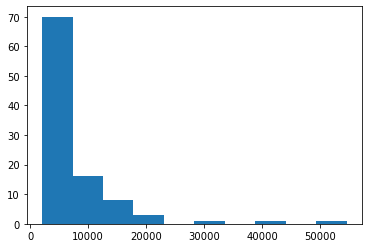

In [233]:
import matplotlib.pyplot as plt

plt.hist(freqs_pos);

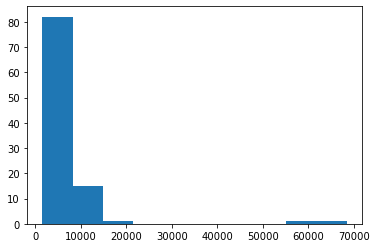

In [234]:
plt.hist(freqs_neg);

In [239]:
POS_pos = np.array([tup[1] for tup in sorted_by_freq[:100]])
POS_neg = np.array([tup[1] for tup in sorted_by_freq_neg[:100]])

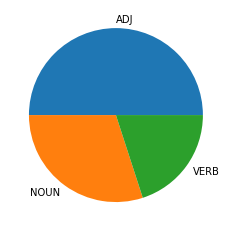

In [240]:
labels, counts = np.unique(POS_pos, return_counts = True)
plt.pie(counts, labels = labels);

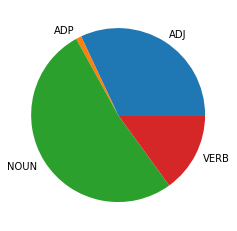

In [241]:
labels, counts = np.unique(POS_neg, return_counts = True)
plt.pie(counts, labels = labels);